---

# Predict Sales Prices

---

In [38]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import *
import scipy.stats as stats

In [39]:
pd.set_option('display.max_row', 85)
pd.set_option('display.max_column', 85)

# Data loading

In [40]:
# Train dataset
train_df = pd.read_csv("house-prices-train.csv")

# Test dataset
test_df = pd.read_csv("house-prices-test.csv")

# Visualize Data

In [41]:
print(train_df.shape)
train_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Analysis of form

### Data type distribution

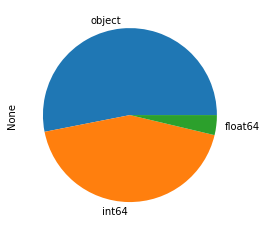

In [43]:
plt.figure()
train_df.dtypes.value_counts().plot.pie()

### Missing values

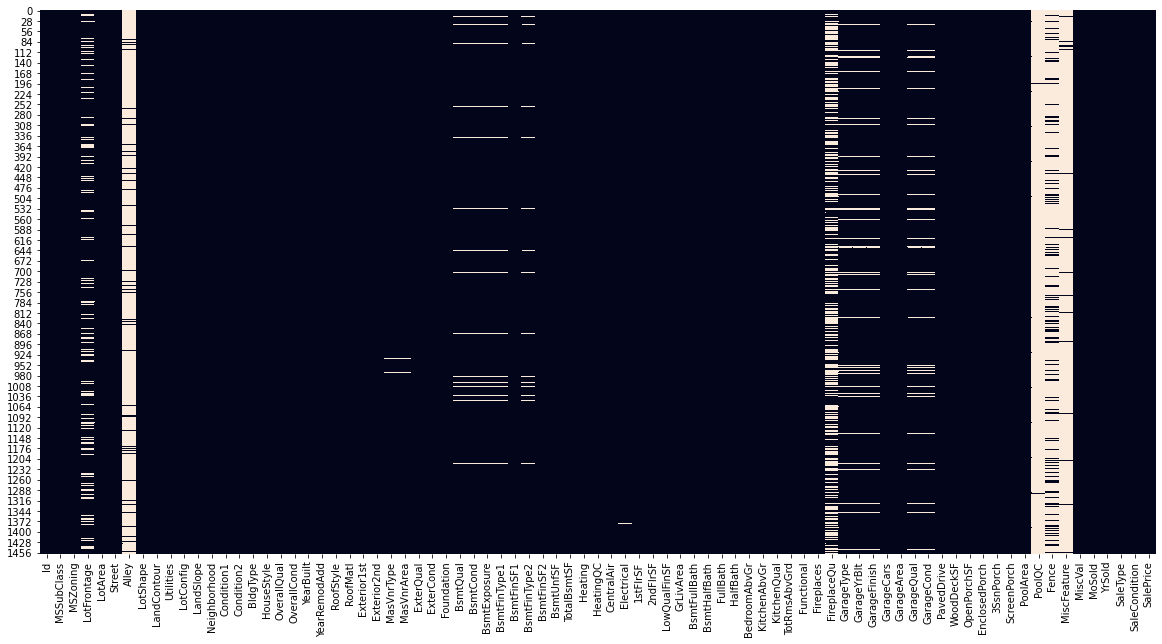

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isna(), cbar=False)

### Percentage of missing values

In [45]:
(train_df.isna().sum()/train_df.shape[0]).sort_values(ascending=True).to_frame()

,0
Id,0.000000
TotalBsmtSF,0.000000
Heating,0.000000
SaleCondition,0.000000
CentralAir,0.000000
1stFlrSF,0.000000
2ndFlrSF,0.000000
LowQualFinSF,0.000000
GrLivArea,0.000000
BsmtFullBath,0.000000


As we are only 1400 rows, let's delete variables with more than 15% of missing values:
- PoolQC : 99% of missing values
- MiscFeature : of missing values
- Alley : 93% of missing values
- Fence : 80% of missing values
- FireplaceQu : 47% of missing values
- lotfrontage : 17% of missing values

In [46]:
train_df = train_df[train_df.columns[(train_df.isna().sum()/train_df.shape[0]) < 0.15]]
print(train_df.shape)
train_df.head()

(1460, 75)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Create float and categorical dataframes

In [47]:
# categorical columns
train_df_categorical = train_df.select_dtypes(exclude = np.number)
print("Categorical datframe shape: ", train_df_categorical.shape)

# numeric columns
train_df_numeric = train_df.select_dtypes(np.number)
print("Numeric dataframe shape: ", train_df_numeric.shape)

Categorical datframe shape:  (1460, 38)
Numeric dataframe shape:  (1460, 37)


##### Some columns encoded have been consider as numeric. so let put them in the categorical dataframe ("MSSubClass", "OverallQual", "OverallCond"). I also gonna drop the ID column.

In [48]:
train_df_categorical["MSSubClass"] = train_df["MSSubClass"]
train_df_categorical["OverallQual"] = train_df["OverallQual"]
train_df_categorical["OverallCond"] = train_df["OverallCond"]
train_df_numeric.drop(["Id", "MSSubClass", "OverallQual", "OverallCond"], axis = 1, inplace = True)
print("Categorical datframe shape: ", train_df_categorical.shape)
print("Numeric dataframe shape: ", train_df_numeric.shape)

Categorical datframe shape:  (1460, 41)
Numeric dataframe shape:  (1460, 33)


/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

We are now our 2 dataframes ready.

I will use Pearson correlation to delete variables less correlated with the target for numeric variables and an ANOVA test for categorical variables.

# Use dataprep library to explore our numeric dataframe

In [49]:
plot(train_df_numeric)

As we can see, some variables provide little information (LowQualfinSF, 3ssnPorch, poolArea, MiscVal). We can therefore think that these variables would be less correlated with the target. Let's verify this with the correlations matrix.

### Understand correlation

In [50]:
plt.figure(figsize=(15,15))
plot_correlation(train_df_numeric)

<Figure size 1080x1080 with 0 Axes>

### Let's deleted variables less correlated with the target (SalePrice)

- YrSold : 3%
- MoSold : 5%
- MiscVal : 2%
- 3SsnPorch : 4%
- BsmtFinSF2 : 1%
- LowQualFinSF : 3%
- BsmtHalfBath : 2%

In [51]:
train_df_numeric.drop(["YrSold", "MoSold", "MiscVal", "3SsnPorch", "BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath"], axis = 1, inplace = True)
train_df_numeric.shape

/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1460, 26)

# Understand categorical variables

In [52]:
df_categ = train_df_categorical.copy()

In [53]:
df_categ["SalePrice"] = train_df_numeric["SalePrice"]

In [54]:
plot(train_df_categorical.drop(["MSSubClass", "OverallQual", "OverallCond"], axis = 1))

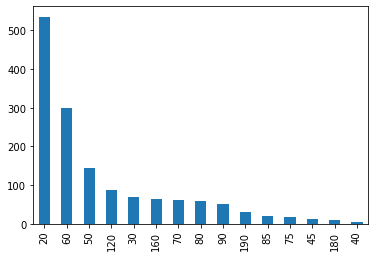

In [55]:
train_df_categorical["MSSubClass"].value_counts().plot(kind = "bar")

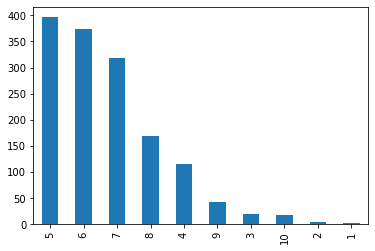

In [56]:
train_df_categorical["OverallQual"].value_counts().plot(kind = "bar")

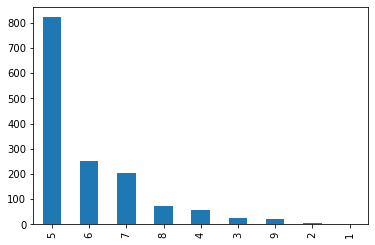

In [57]:
train_df_categorical["OverallCond"].value_counts().plot(kind = "bar")

In [58]:
train_df_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond'],
      dtype='object')

In [59]:
print(df_categ.shape)
df_categ.head(2)

(1460, 42)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,20,6,8,181500


# ANOVA

### MSZoning

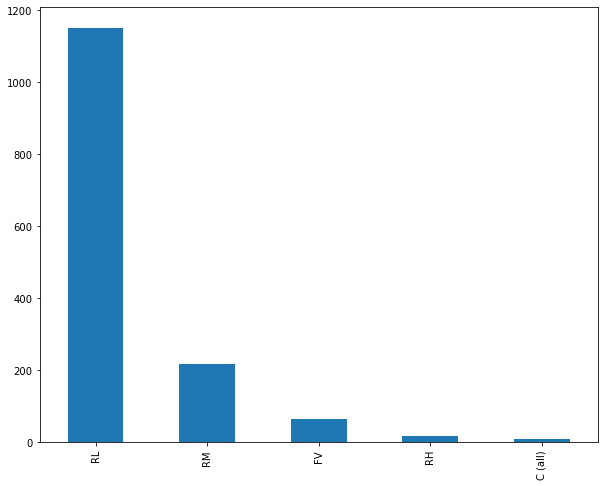

In [63]:
plt.figure(figsize=(10,8))
train_df_categorical["MSZoning"].value_counts().plot(kind = "bar")

In [64]:
df_categ.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond', 'SalePrice'],
      dtype='object')

In [65]:
import scipy.stats as stats

stats.f_oneway(df_categ['SalePrice'][df_categ['MSZoning'] == 'RL'],
               df_categ['SalePrice'][df_categ['MSZoning'] == 'RM'],
               df_categ['SalePrice'][df_categ['MSZoning'] == 'FV'],
               df_categ['SalePrice'][df_categ['MSZoning'] == 'RH'],
               df_categ['SalePrice'][df_categ['MSZoning'] == 'C (all)'])

F_onewayResult(statistic=43.84028167245718, pvalue=8.817633866272648e-35)

### Street

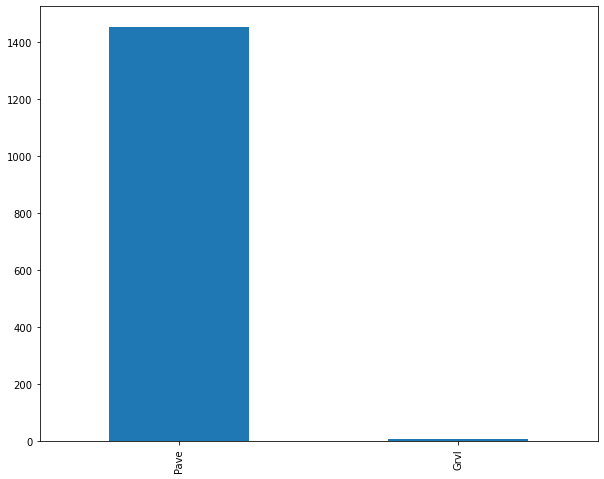

In [66]:
plt.figure(figsize=(10,8))
df_categ["Street"].value_counts().plot(kind = "bar")

In [67]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Street'] == 'Pave'],
               df_categ['SalePrice'][df_categ['Street'] == 'Grvl']
               )

F_onewayResult(statistic=2.4592895583691994, pvalue=0.11704860406782483)

The pvalue of ANOVA's test > 5%. We can then delete the variable **Street**.

### 'LotShape'

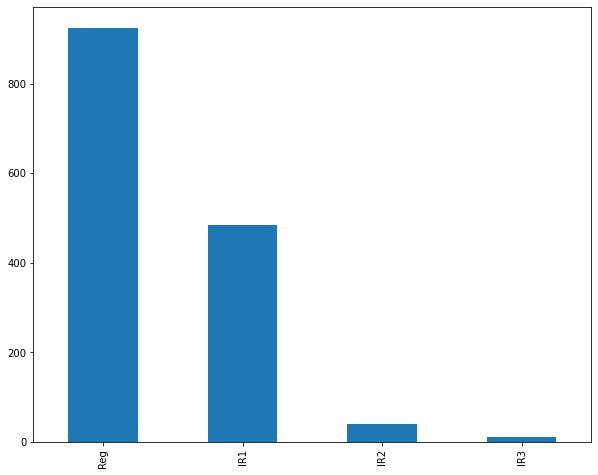

In [68]:
plt.figure(figsize=(10,8))
df_categ["LotShape"].value_counts().plot(kind = "bar")

In [69]:
stats.f_oneway(df_categ['SalePrice'][df_categ['LotShape'] == 'Reg'],
               df_categ['SalePrice'][df_categ['LotShape'] == 'IR1'],
               df_categ['SalePrice'][df_categ['LotShape'] == 'IR2'],
               df_categ['SalePrice'][df_categ['LotShape'] == 'IR3']
               )

F_onewayResult(statistic=40.13285166226295, pvalue=6.447523852011766e-25)

### 'LandContour'

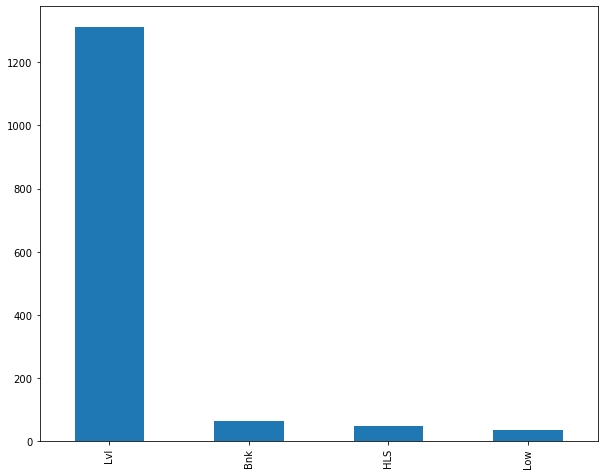

In [70]:
plt.figure(figsize=(10,8))
df_categ['LandContour'].value_counts().plot(kind = "bar")

In [71]:
stats.f_oneway(df_categ['SalePrice'][df_categ['LandContour'] == 'Lvl'],
               df_categ['SalePrice'][df_categ['LandContour'] == 'Bnk'],
               df_categ['SalePrice'][df_categ['LandContour'] == 'HLS'],
               df_categ['SalePrice'][df_categ['LandContour'] == 'Low'])

F_onewayResult(statistic=12.850188333283924, pvalue=2.7422167521379096e-08)

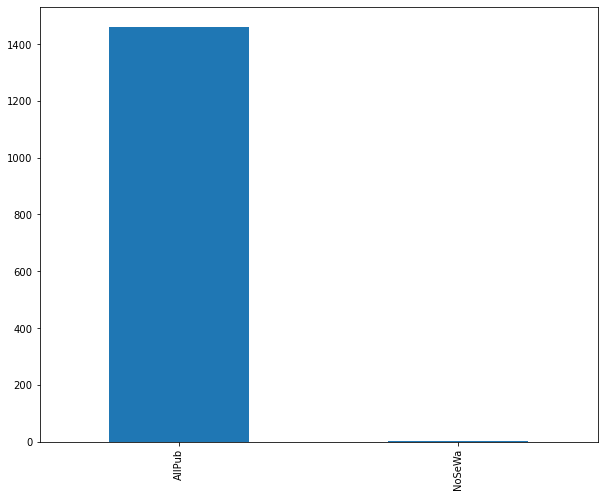

In [72]:
plt.figure(figsize=(10,8))
df_categ['Utilities'].value_counts().plot(kind = "bar")

In [73]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Utilities'] == 'AllPub'],
               df_categ['SalePrice'][df_categ['Utilities'] == 'NoSeWa'])

F_onewayResult(statistic=0.29880407484898486, pvalue=0.5847167739689381)

The pvalue of ANOVA's test (58%) > 5%. We will also delete this variable.

### 'LotConfig'

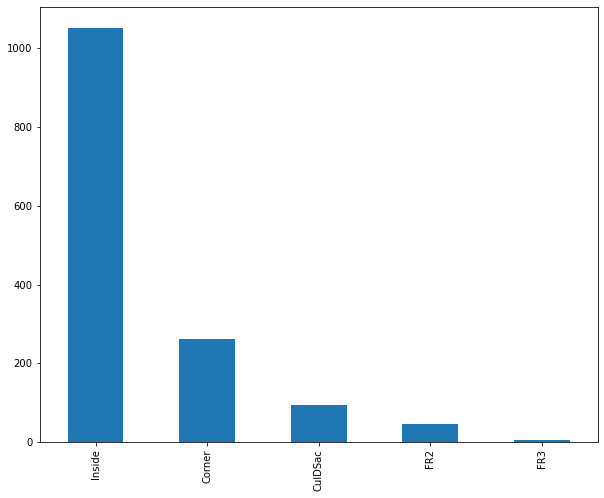

In [74]:
plt.figure(figsize=(10,8))
df_categ['LotConfig'].value_counts().plot(kind = "bar")

In [75]:
stats.f_oneway(df_categ['SalePrice'][df_categ['LotConfig'] == 'Inside'],
               df_categ['SalePrice'][df_categ['LotConfig'] == 'Corner'],
               df_categ['SalePrice'][df_categ['LotConfig'] == 'CulDSac'],
               df_categ['SalePrice'][df_categ['LotConfig'] == 'FR2'],
               df_categ['SalePrice'][df_categ['LotConfig'] == 'FR3'])

F_onewayResult(statistic=7.80995412346779, pvalue=3.163167473604189e-06)

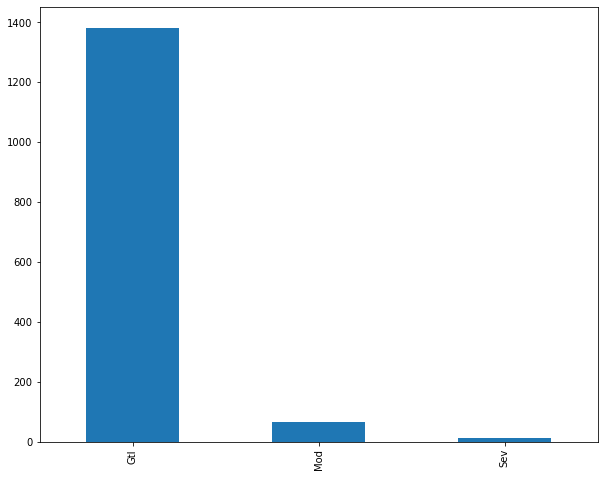

In [76]:
plt.figure(figsize=(10,8))
df_categ['LandSlope'].value_counts().plot(kind = "bar")

In [77]:
stats.f_oneway(df_categ['SalePrice'][df_categ['LandSlope'] == 'Gtl'],
               df_categ['SalePrice'][df_categ['LandSlope'] == 'Mod'],
               df_categ['SalePrice'][df_categ['LandSlope'] == 'Sev'])

F_onewayResult(statistic=1.9588170374149438, pvalue=0.1413963584114019)

The pvalue of ANOVA's test (14%) > 5%. We will also delete this variable.

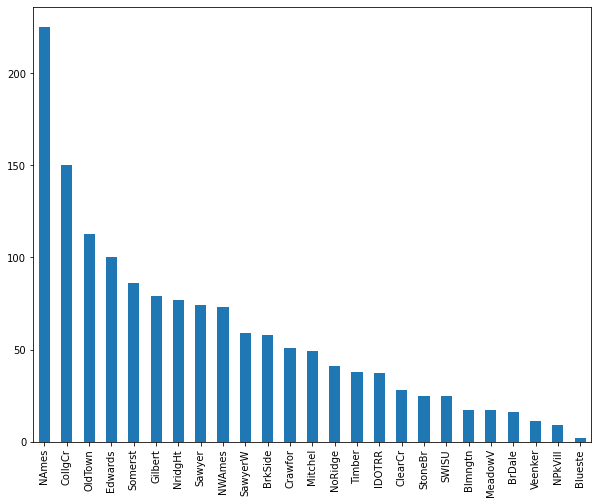

In [78]:
plt.figure(figsize=(10,8))
df_categ['Neighborhood'].value_counts().plot(kind = "bar")

In [79]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Neighborhood'] == 'NAmes'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'CollgCr'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'OldTown'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Edwards'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Somerst'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Gilbert'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'NridgHt'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Sawyer'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'NWAmes'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'SawyerW'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'BrkSide'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Crawfor'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Mitchel'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'NoRidge'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Timber'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'IDOTRR'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'ClearCr'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'StoneBr'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'SWISU'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Blmngtn'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'MeadowV'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'BrDale'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Veenker'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'NPkVill'],
               df_categ['SalePrice'][df_categ['Neighborhood'] == 'Blueste']
              )

F_onewayResult(statistic=71.78486512058272, pvalue=1.558600282771154e-225)

### 'Condition1'

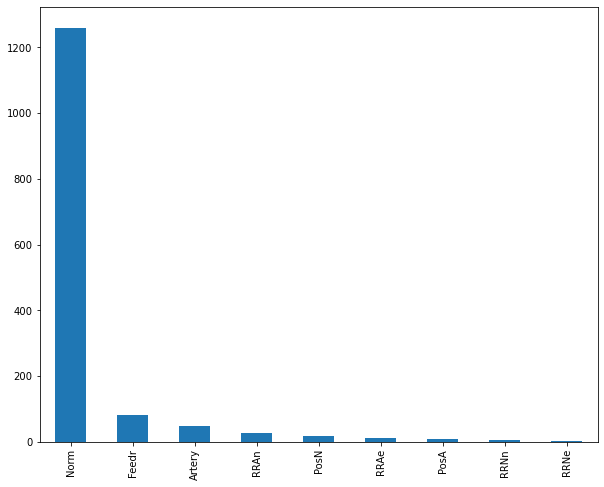

In [80]:
plt.figure(figsize=(10,8))
df_categ['Condition1'].value_counts().plot(kind = "bar")

In [81]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Condition1'] == 'Norm'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'Feedr'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'Artery'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'RRAn'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'PosN'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'RRAe'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'PosA'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'RRNn'],
               df_categ['SalePrice'][df_categ['Condition1'] == 'RRNe']
              )

F_onewayResult(statistic=6.118017137125927, pvalue=8.904549416138853e-08)

### 'Condition2'

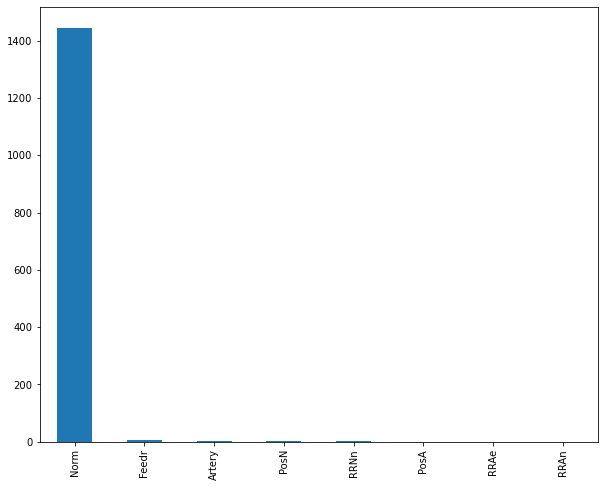

In [82]:
plt.figure(figsize=(10,8))
df_categ['Condition2'].value_counts().plot(kind = "bar")

In [83]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Condition2'] == 'Norm'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'Feedr'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'Artery'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'RRNn'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'PosN'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'RRAn'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'RRAe'],
               df_categ['SalePrice'][df_categ['Condition2'] == 'PosA']
               
              )

F_onewayResult(statistic=2.0738986215227877, pvalue=0.043425658360948464)

### 'BldgType'

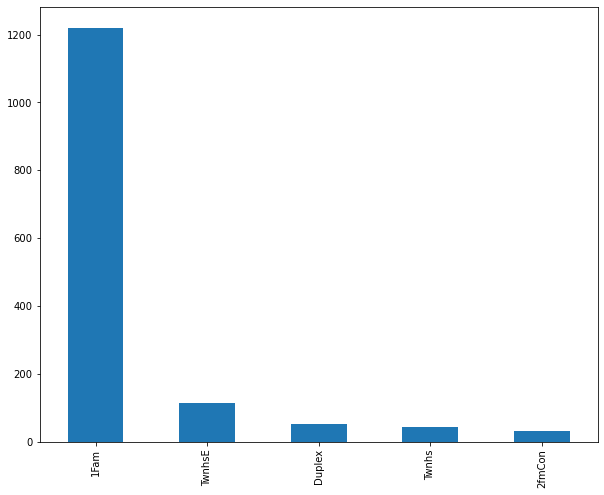

In [84]:
plt.figure(figsize=(10,8))
df_categ['BldgType'].value_counts().plot(kind = "bar")

In [85]:
stats.f_oneway(df_categ['SalePrice'][df_categ['BldgType'] == '1Fam'],
               df_categ['SalePrice'][df_categ['BldgType'] == 'TwnhsE'],
               df_categ['SalePrice'][df_categ['BldgType'] == 'Duplex'],
               df_categ['SalePrice'][df_categ['BldgType'] == 'Twnhs'],
               df_categ['SalePrice'][df_categ['BldgType'] == '2fmCon'])

F_onewayResult(statistic=13.011077169620851, pvalue=2.0567364604967015e-10)

### 'HouseStyle'

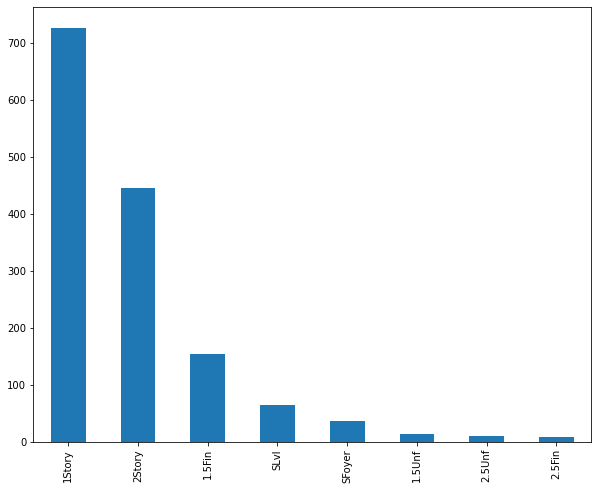

In [86]:
plt.figure(figsize=(10,8))
df_categ['HouseStyle'].value_counts().plot(kind = "bar")

In [88]:
stats.f_oneway(df_categ['SalePrice'][df_categ['HouseStyle'] == '1Story'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == '2Story'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == '1.5Fin'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == 'SLvl'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == 'SFoyer'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == '1.5Unf'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == '2.5Unf'],
               df_categ['SalePrice'][df_categ['HouseStyle'] == '2.5Fin']
              )

F_onewayResult(statistic=19.595000995981216, pvalue=3.376776535121222e-25)

### 'RoofStyle'

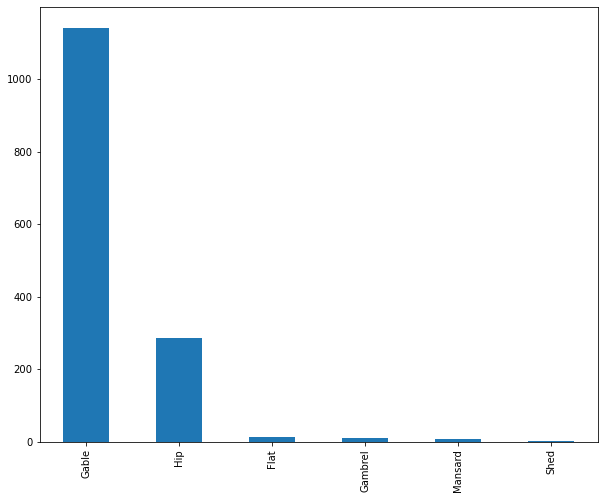

In [89]:
plt.figure(figsize=(10,8))
df_categ['RoofStyle'].value_counts().plot(kind = "bar")

In [90]:
stats.f_oneway(df_categ['SalePrice'][df_categ['RoofStyle'] == 'Gable'],
               df_categ['SalePrice'][df_categ['RoofStyle'] == 'Hip'],
               df_categ['SalePrice'][df_categ['RoofStyle'] == 'Flat'],
               df_categ['SalePrice'][df_categ['RoofStyle'] == 'Gambrel'],
               df_categ['SalePrice'][df_categ['RoofStyle'] == 'Mansard'],
               df_categ['SalePrice'][df_categ['RoofStyle'] == 'Shed']
              )

F_onewayResult(statistic=17.80549722914421, pvalue=3.653523047099125e-17)

### 'RoofMatl'

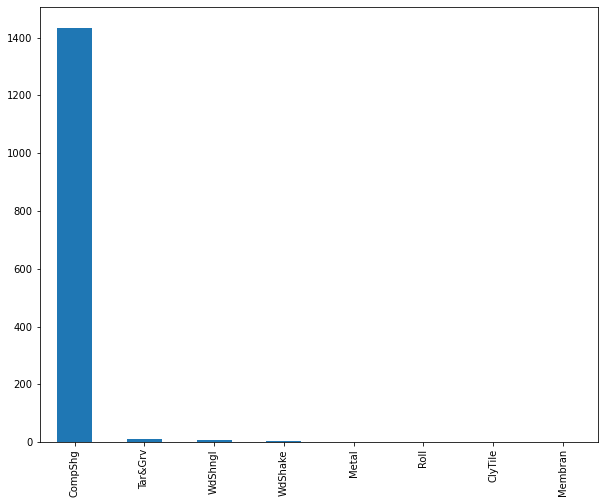

In [91]:
plt.figure(figsize=(10,8))
df_categ['RoofMatl'].value_counts().plot(kind = "bar")

In [92]:
stats.f_oneway(df_categ['SalePrice'][df_categ['RoofMatl'] == 'CompShg'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'Tar&Grv'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'WdShngl'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'WdShake'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'Roll'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'Membran'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'Metal'],
               df_categ['SalePrice'][df_categ['RoofMatl'] == 'ClyTile']
              )

F_onewayResult(statistic=6.727304893420314, pvalue=7.231444779987188e-08)

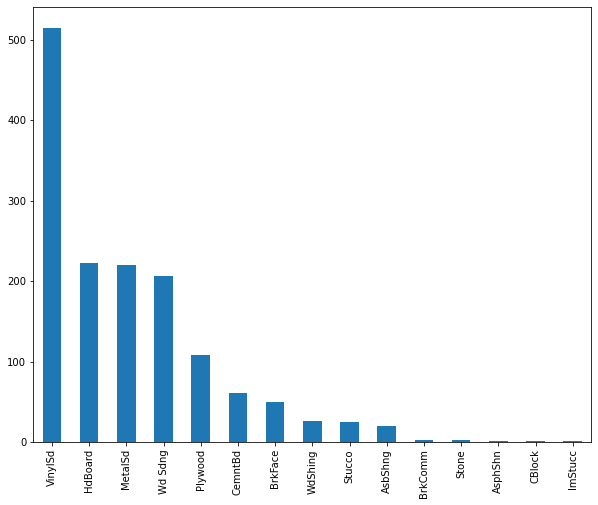

In [93]:
plt.figure(figsize=(10,8))
df_categ['Exterior1st'].value_counts().plot(kind = "bar")

In [94]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Exterior1st'] == 'VinylSd'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'HdBoard'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'MetalSd'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'Wd Sdng'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'Plywood'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'CemntBd'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'BrkFace'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'WdShing'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'Stucco'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'AsbShng'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'Stone'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'BrkComm'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'CBlock'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'AsphShn'],
               df_categ['SalePrice'][df_categ['Exterior1st'] == 'ImStucc']
              )

F_onewayResult(statistic=18.611742866245784, pvalue=2.5860887286376316e-43)

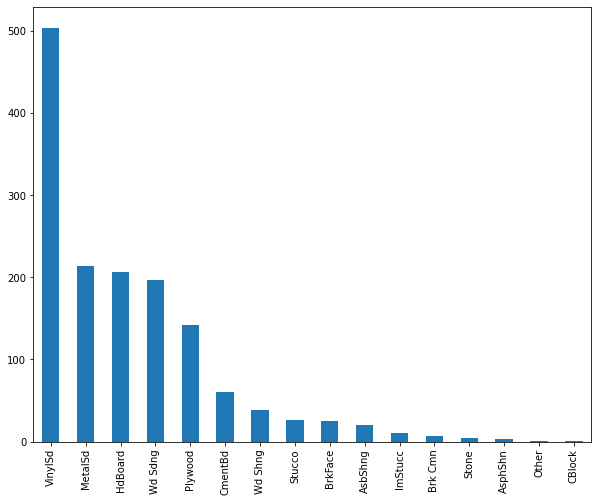

In [95]:
plt.figure(figsize=(10,8))
df_categ['Exterior2nd'].value_counts().plot(kind = "bar")

In [96]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Exterior2nd'] == 'VinylSd'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'MetalSd'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'HdBoard'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Wd Sdng'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Plywood'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'CmentBd'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Wd Shng'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Stucco'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'BrkFace'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'AsbShng'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'ImStucc'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Brk Cmn'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Stone'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'AsphShn'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'CBlock'],
               df_categ['SalePrice'][df_categ['Exterior2nd'] == 'Other']
              )

F_onewayResult(statistic=17.50083957136984, pvalue=4.8421856706985465e-43)

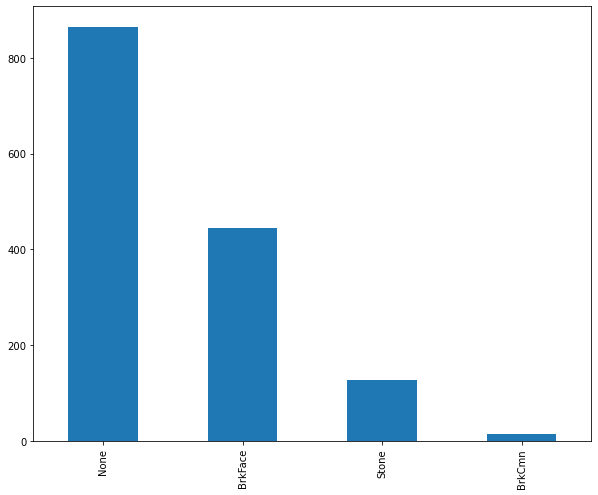

In [97]:
plt.figure(figsize=(10,8))
df_categ['MasVnrType'].value_counts().plot(kind = "bar")

In [98]:
stats.f_oneway(df_categ['SalePrice'][df_categ['MasVnrType'] == 'None'],
               df_categ['SalePrice'][df_categ['MasVnrType'] == 'BrkFace'],
               df_categ['SalePrice'][df_categ['MasVnrType'] == 'Stone'],
               df_categ['SalePrice'][df_categ['MasVnrType'] == 'BrkCmn'])

F_onewayResult(statistic=111.67238008941875, pvalue=4.793331178118786e-65)

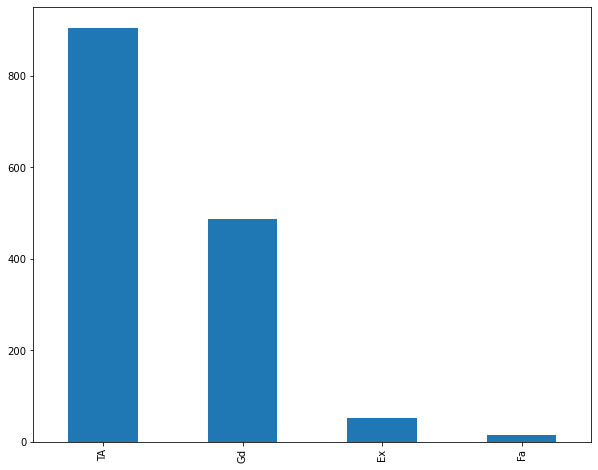

In [99]:
plt.figure(figsize=(10,8))
df_categ['ExterQual'].value_counts().plot(kind = "bar")

In [100]:
stats.f_oneway(df_categ['SalePrice'][df_categ['ExterQual'] == 'TA'],
               df_categ['SalePrice'][df_categ['ExterQual'] == 'Gd'],
               df_categ['SalePrice'][df_categ['ExterQual'] == 'Ex'],
               df_categ['SalePrice'][df_categ['ExterQual'] == 'Fa'])

F_onewayResult(statistic=443.33483141504627, pvalue=1.4395510967787893e-204)

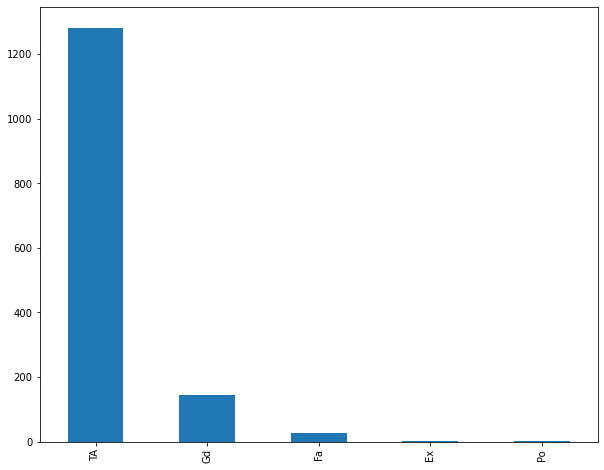

In [101]:
plt.figure(figsize=(10,8))
df_categ['ExterCond'].value_counts().plot(kind = "bar")

In [102]:
stats.f_oneway(df_categ['SalePrice'][df_categ['ExterCond'] == 'TA'],
               df_categ['SalePrice'][df_categ['ExterCond'] == 'Gd'],
               df_categ['SalePrice'][df_categ['ExterCond'] == 'Fa'],
               df_categ['SalePrice'][df_categ['ExterCond'] == 'Ex'],
               df_categ['SalePrice'][df_categ['ExterCond'] == 'Po'])

F_onewayResult(statistic=8.798714214177485, pvalue=5.106680608671862e-07)

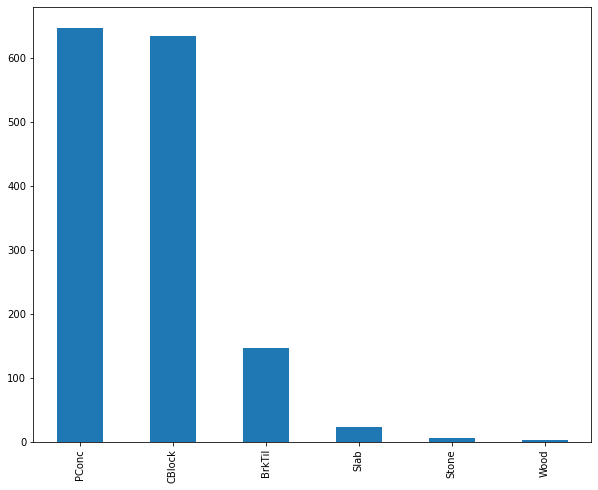

In [103]:
plt.figure(figsize=(10,8))
df_categ['Foundation'].value_counts().plot(kind = "bar")

In [104]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Foundation'] == 'PConc'],
               df_categ['SalePrice'][df_categ['Foundation'] == 'CBlock'],
               df_categ['SalePrice'][df_categ['Foundation'] == 'BrkTil'],
               df_categ['SalePrice'][df_categ['Foundation'] == 'Slab'],
               df_categ['SalePrice'][df_categ['Foundation'] == 'Stone'],
               df_categ['SalePrice'][df_categ['Foundation'] == 'Wood']
              )

F_onewayResult(statistic=100.25385058740888, pvalue=5.791895002232233e-91)

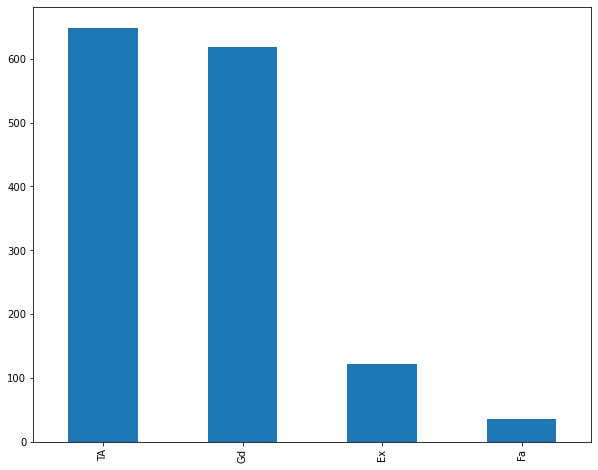

In [105]:
plt.figure(figsize=(10,8))
df_categ['BsmtQual'].value_counts().plot(kind = "bar")

In [106]:
stats.f_oneway(df_categ['SalePrice'][df_categ['BsmtQual'] == 'TA'],
               df_categ['SalePrice'][df_categ['BsmtQual'] == 'Gd'],
               df_categ['SalePrice'][df_categ['BsmtQual'] == 'Ex'],
               df_categ['SalePrice'][df_categ['BsmtQual'] == 'Fa'])

F_onewayResult(statistic=392.9135064723092, pvalue=9.610615106781709e-186)

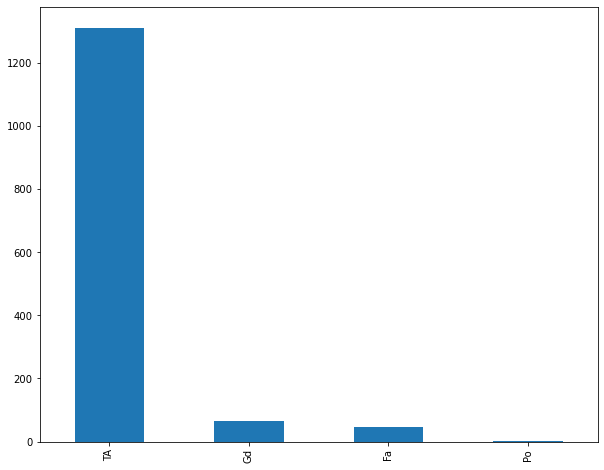

In [107]:
plt.figure(figsize=(10,8))
df_categ['BsmtCond'].value_counts().plot(kind = "bar")

In [108]:
stats.f_oneway(df_categ['SalePrice'][df_categ['BsmtCond'] == 'TA'],
               df_categ['SalePrice'][df_categ['BsmtCond'] == 'Gd'],
               df_categ['SalePrice'][df_categ['BsmtCond'] == 'Gd'],
               df_categ['SalePrice'][df_categ['BsmtCond'] == 'Fa'],
               df_categ['SalePrice'][df_categ['BsmtCond'] == 'Po'])

F_onewayResult(statistic=12.992205566979585, pvalue=2.1137756826838055e-10)

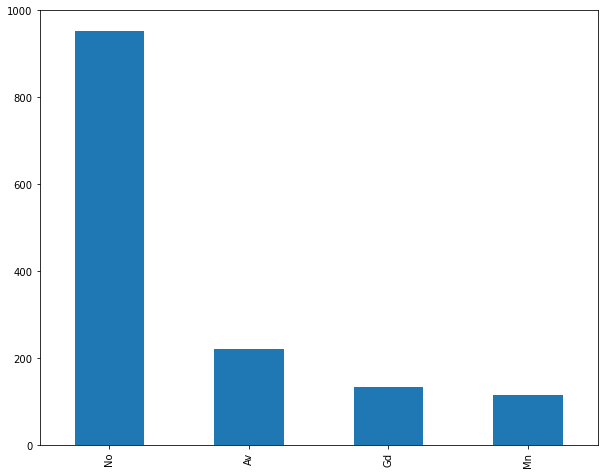

In [109]:
plt.figure(figsize=(10,8))
df_categ['BsmtExposure'].value_counts().plot(kind = "bar")

In [110]:
stats.f_oneway(df_categ['SalePrice'][df_categ['BsmtExposure'] == 'No'],
               df_categ['SalePrice'][df_categ['BsmtExposure'] == 'Av'],
               df_categ['SalePrice'][df_categ['BsmtExposure'] == 'Gd'],
               df_categ['SalePrice'][df_categ['BsmtExposure'] == 'Mn'])

F_onewayResult(statistic=70.88798364989222, pvalue=1.022670629183227e-42)

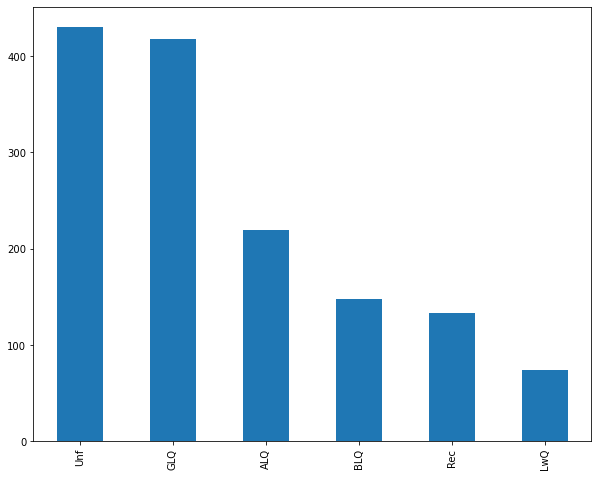

In [111]:
plt.figure(figsize=(10,8))
df_categ['BsmtFinType1'].value_counts().plot(kind = "bar")

In [112]:
stats.f_oneway(df_categ['SalePrice'][df_categ['BsmtFinType1'] == 'Unf'],
               df_categ['SalePrice'][df_categ['BsmtFinType1'] == 'GLQ'],
               df_categ['SalePrice'][df_categ['BsmtFinType1'] == 'ALQ'],
               df_categ['SalePrice'][df_categ['BsmtFinType1'] == 'BLQ'],
               df_categ['SalePrice'][df_categ['BsmtFinType1'] == 'Rec'],
               df_categ['SalePrice'][df_categ['BsmtFinType1'] == 'LwQ']
              )

F_onewayResult(statistic=67.60217483627741, pvalue=1.8077310066862167e-63)

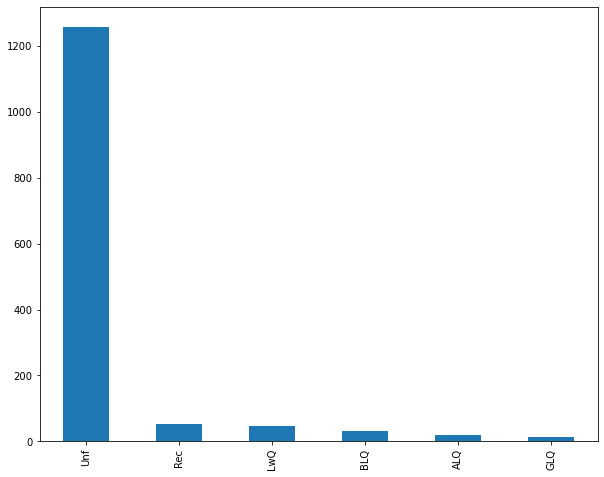

In [113]:
plt.figure(figsize=(10,8))
df_categ['BsmtFinType2'].value_counts().plot(kind = "bar")

In [114]:
stats.f_oneway(df_categ['SalePrice'][df_categ['BsmtFinType2'] == 'Unf'],
               df_categ['SalePrice'][df_categ['BsmtFinType2'] == 'Rec'],
               df_categ['SalePrice'][df_categ['BsmtFinType2'] == 'LwQ'],
               df_categ['SalePrice'][df_categ['BsmtFinType2'] == 'BLQ'],
               df_categ['SalePrice'][df_categ['BsmtFinType2'] == 'ALQ'],
               df_categ['SalePrice'][df_categ['BsmtFinType2'] == 'GLQ']
              )

F_onewayResult(statistic=2.702450185378047, pvalue=0.019410089690234594)

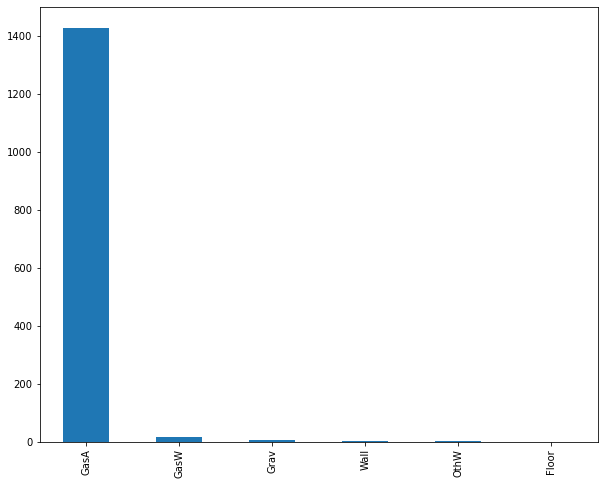

In [115]:
plt.figure(figsize=(10,8))
df_categ['Heating'].value_counts().plot(kind = "bar")

In [116]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Heating'] == 'GasA'],
               df_categ['SalePrice'][df_categ['Heating'] == 'GasW'],
               df_categ['SalePrice'][df_categ['Heating'] == 'Grav'],
               df_categ['SalePrice'][df_categ['Heating'] == 'Wall'],
               df_categ['SalePrice'][df_categ['Heating'] == 'OthW'],
               df_categ['SalePrice'][df_categ['Heating'] == 'Floor']
              )

F_onewayResult(statistic=4.259818559406287, pvalue=0.000753472106445497)

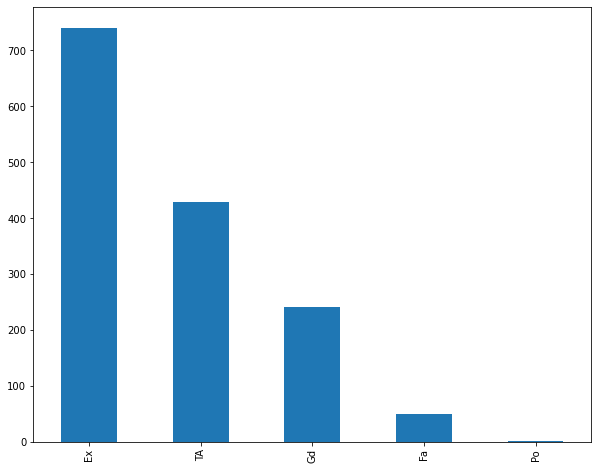

In [117]:
plt.figure(figsize=(10,8))
df_categ['HeatingQC'].value_counts().plot(kind = "bar")

In [118]:
stats.f_oneway(df_categ['SalePrice'][df_categ['HeatingQC'] == 'Ex'],
               df_categ['SalePrice'][df_categ['HeatingQC'] == 'TA'],
               df_categ['SalePrice'][df_categ['HeatingQC'] == 'Gd'],
               df_categ['SalePrice'][df_categ['HeatingQC'] == 'Fa'],
               df_categ['SalePrice'][df_categ['HeatingQC'] == 'Po'])

F_onewayResult(statistic=88.39446198869798, pvalue=2.667062092104357e-67)

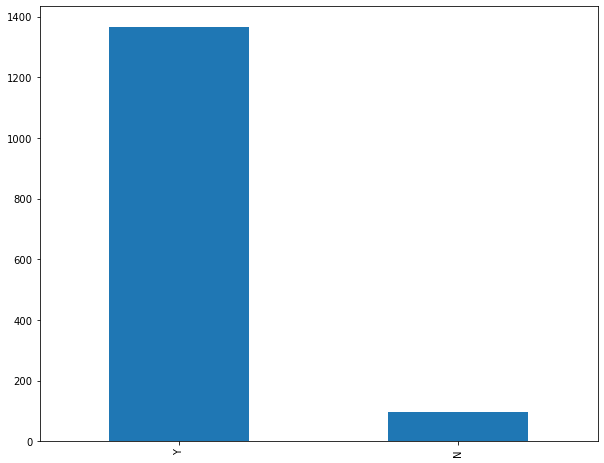

In [119]:
plt.figure(figsize=(10,8))
df_categ['CentralAir'].value_counts().plot(kind = "bar")

In [120]:
stats.f_oneway(df_categ['SalePrice'][df_categ['CentralAir'] == 'Y'],
               df_categ['SalePrice'][df_categ['CentralAir'] == 'N'])

F_onewayResult(statistic=98.30534356615253, pvalue=1.8095061559267854e-22)

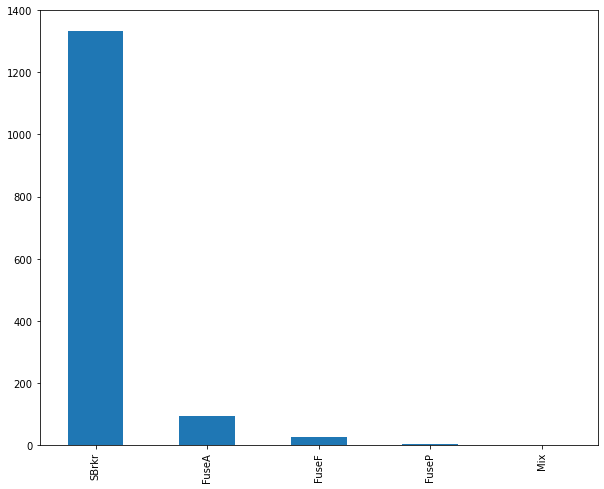

In [121]:
plt.figure(figsize=(10,8))
df_categ['Electrical'].value_counts().plot(kind = "bar")

In [122]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Electrical'] == 'SBrkr'],
               df_categ['SalePrice'][df_categ['Electrical'] == 'FuseA'],
               df_categ['SalePrice'][df_categ['Electrical'] == 'FuseF'],
               df_categ['SalePrice'][df_categ['Electrical'] == 'FuseP'],
               df_categ['SalePrice'][df_categ['Electrical'] == 'Mix'])

F_onewayResult(statistic=23.06767302405713, pvalue=1.6632487814737638e-18)

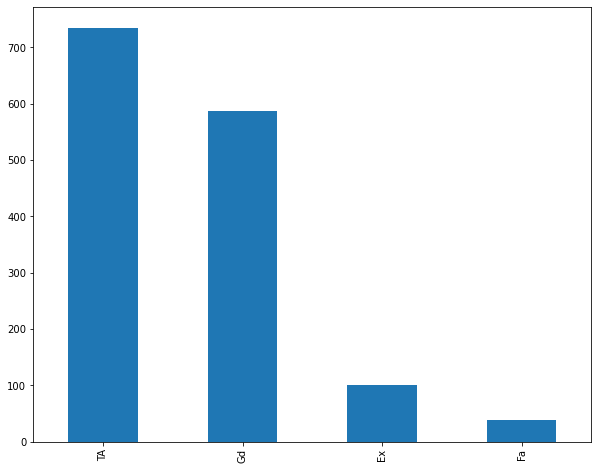

In [123]:
plt.figure(figsize=(10,8))
df_categ['KitchenQual'].value_counts().plot(kind = "bar")

In [124]:
stats.f_oneway(df_categ['SalePrice'][df_categ['KitchenQual'] == 'TA'],
               df_categ['SalePrice'][df_categ['KitchenQual'] == 'Gd'],
               df_categ['SalePrice'][df_categ['KitchenQual'] == 'Ex'],
               df_categ['SalePrice'][df_categ['KitchenQual'] == 'Fa'])

F_onewayResult(statistic=407.80635155838877, pvalue=3.0322127528400614e-192)

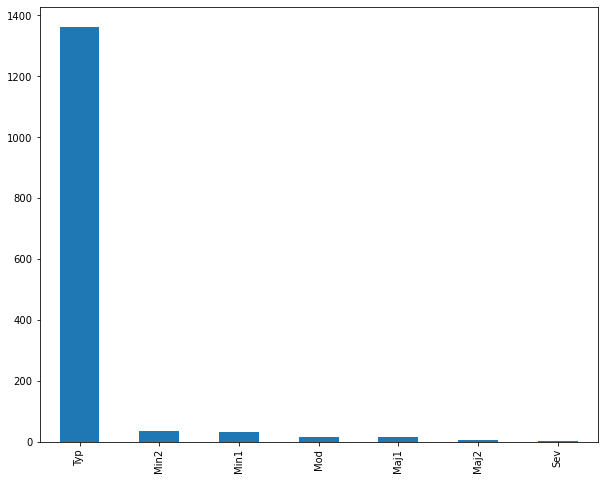

In [125]:
plt.figure(figsize=(10,8))
df_categ['Functional'].value_counts().plot(kind = "bar")

In [126]:
stats.f_oneway(df_categ['SalePrice'][df_categ['Functional'] == 'Typ'],
               df_categ['SalePrice'][df_categ['Functional'] == 'Min2'],
               df_categ['SalePrice'][df_categ['Functional'] == 'Min1'],
               df_categ['SalePrice'][df_categ['Functional'] == 'Mod'],
               df_categ['SalePrice'][df_categ['Functional'] == 'Maj1'],
               df_categ['SalePrice'][df_categ['Functional'] == 'Maj2'],
               df_categ['SalePrice'][df_categ['Functional'] == 'Sev']
              )

F_onewayResult(statistic=4.0578754277920215, pvalue=0.0004841696801078294)

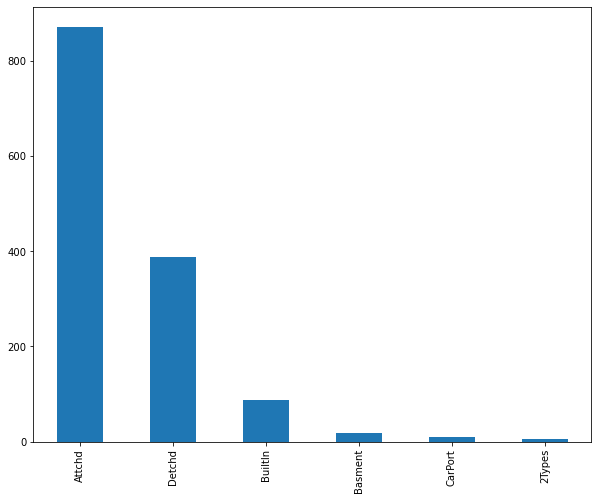

In [127]:
plt.figure(figsize=(10,8))
df_categ['GarageType'].value_counts().plot(kind = "bar")

In [128]:
stats.f_oneway(df_categ['SalePrice'][df_categ['GarageType'] == 'Attchd'],
               df_categ['SalePrice'][df_categ['GarageType'] == 'Detchd'],
               df_categ['SalePrice'][df_categ['GarageType'] == 'BuiltIn'],
               df_categ['SalePrice'][df_categ['GarageType'] == 'Basment'],
               df_categ['SalePrice'][df_categ['GarageType'] == 'CarPort'],
               df_categ['SalePrice'][df_categ['GarageType'] == '2Types']
              )

F_onewayResult(statistic=71.52212307893011, pvalue=1.247153670658973e-66)

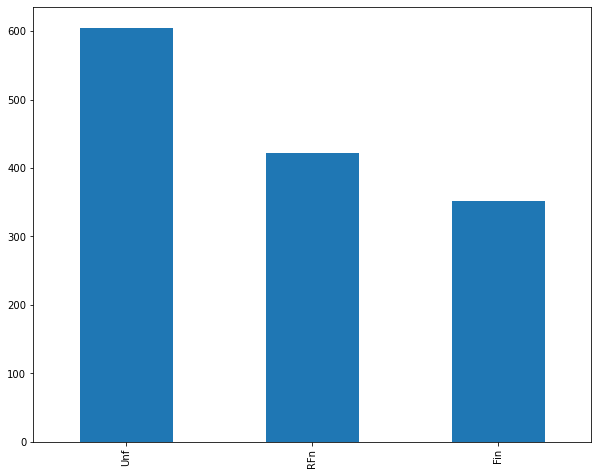

In [129]:
plt.figure(figsize=(10,8))
df_categ['GarageFinish'].value_counts().plot(kind = "bar")

In [130]:
stats.f_oneway(df_categ['SalePrice'][df_categ['GarageFinish'] == 'Unf'],
               df_categ['SalePrice'][df_categ['GarageFinish'] == 'RFn'],
               df_categ['SalePrice'][df_categ['GarageFinish'] == 'Fin'])

F_onewayResult(statistic=250.96246721359347, pvalue=1.1991165312294262e-93)

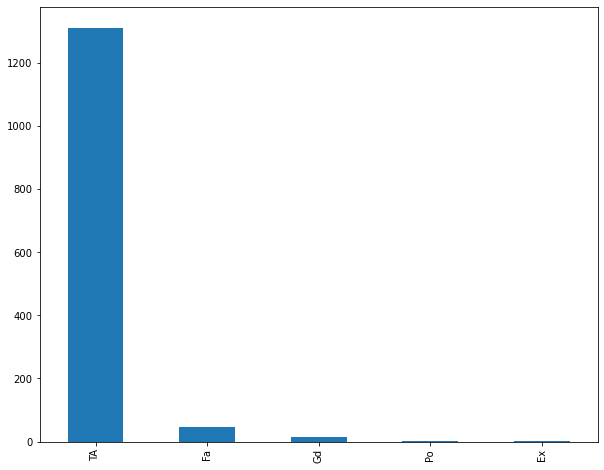

In [136]:
plt.figure(figsize=(10,8))
df_categ['GarageQual'].value_counts().plot(kind = "bar")

In [137]:
stats.f_oneway(df_categ['SalePrice'][df_categ['GarageQual'] == 'TA'],
               df_categ['SalePrice'][df_categ['GarageQual'] == 'Fa'],
               df_categ['SalePrice'][df_categ['GarageQual'] == 'Gd'],
               df_categ['SalePrice'][df_categ['GarageQual'] == 'Po'],
               df_categ['SalePrice'][df_categ['GarageQual'] == 'Ex'])

F_onewayResult(statistic=9.57038935007985, pvalue=1.2408026478015653e-07)

### 'GarageCond'

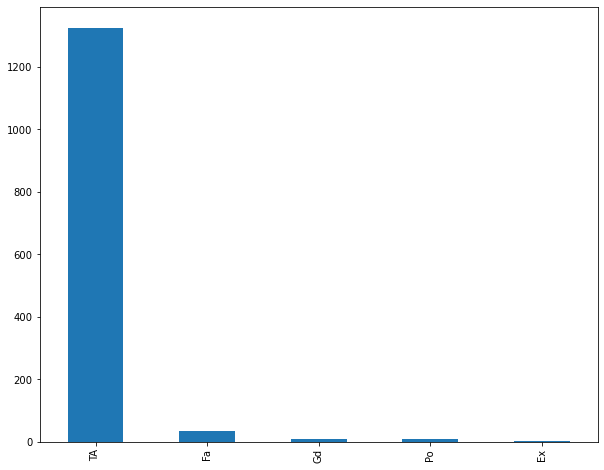

In [138]:
plt.figure(figsize=(10,8))
df_categ['GarageCond'].value_counts().plot(kind = "bar")

In [140]:
stats.f_oneway(df_categ['SalePrice'][df_categ['GarageCond'] == 'TA'],
               df_categ['SalePrice'][df_categ['GarageCond'] == 'Fa'],
               df_categ['SalePrice'][df_categ['GarageCond'] == 'Gd'],
               df_categ['SalePrice'][df_categ['GarageCond'] == 'Po'],
               df_categ['SalePrice'][df_categ['GarageCond'] == 'Ex'])

F_onewayResult(statistic=9.54116095061597, pvalue=1.3097143055289643e-07)

### 'PavedDrive'

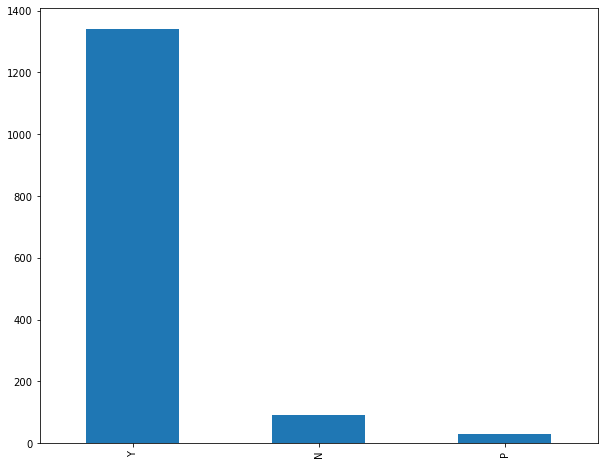

In [141]:
plt.figure(figsize=(10,8))
df_categ['PavedDrive'].value_counts().plot(kind = "bar")

In [142]:
stats.f_oneway(df_categ['SalePrice'][df_categ['PavedDrive'] == 'Y'],
               df_categ['SalePrice'][df_categ['PavedDrive'] == 'N'],
               df_categ['SalePrice'][df_categ['PavedDrive'] == 'P'])

F_onewayResult(statistic=42.02417941762533, pvalue=1.803568890651533e-18)

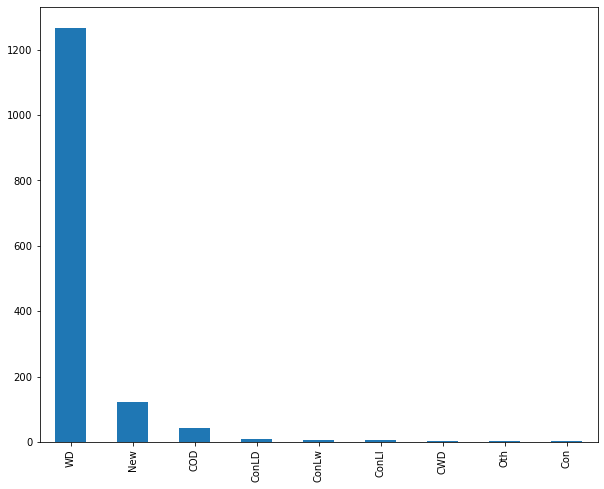

In [143]:
plt.figure(figsize=(10,8))
df_categ['SaleType'].value_counts().plot(kind = "bar")

In [144]:
stats.f_oneway(df_categ['SalePrice'][df_categ['SaleType'] == 'WD'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'New'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'COD'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'ConLD'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'ConLw'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'ConLI'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'CWD'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'Oth'],
               df_categ['SalePrice'][df_categ['SaleType'] == 'Con']
              )

F_onewayResult(statistic=28.863054116984088, pvalue=5.039766889462451e-42)

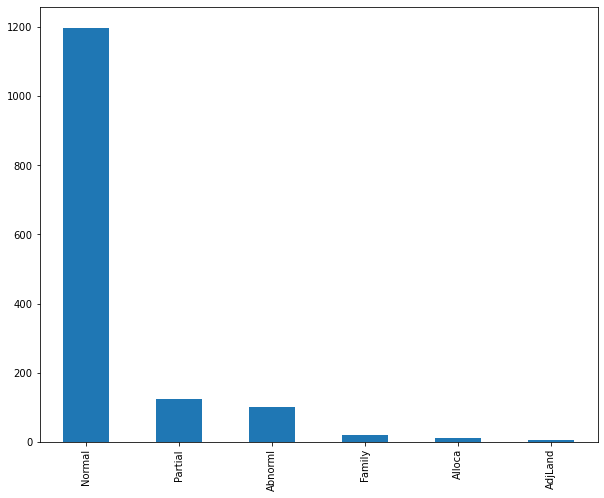

In [145]:
plt.figure(figsize=(10,8))
df_categ['SaleCondition'].value_counts().plot(kind = "bar")

In [146]:
stats.f_oneway(df_categ['SalePrice'][df_categ['SaleCondition'] == 'Normal'],
               df_categ['SalePrice'][df_categ['SaleCondition'] == 'Partial'],
               df_categ['SalePrice'][df_categ['SaleCondition'] == 'Abnorml'],
               df_categ['SalePrice'][df_categ['SaleCondition'] == 'Family'],
               df_categ['SalePrice'][df_categ['SaleCondition'] == 'Alloca'],
               df_categ['SalePrice'][df_categ['SaleCondition'] == 'AdjLand']
              )

F_onewayResult(statistic=45.5784283096957, pvalue=7.988268404991176e-44)

### 'MSSubClass'

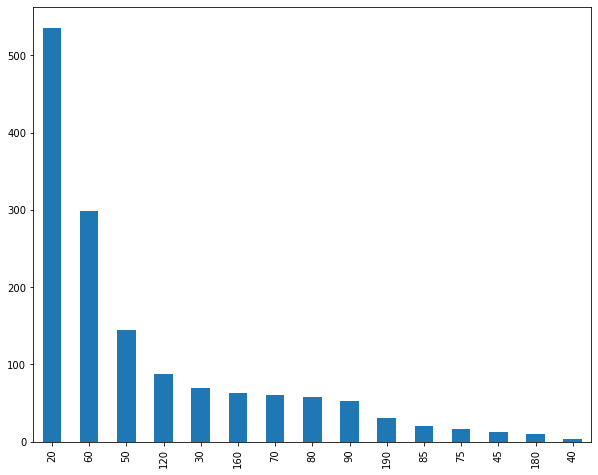

In [159]:
df_categ['MSSubClass'] = df_categ['MSSubClass'].apply(str)
plt.figure(figsize=(10,8))
df_categ['MSSubClass'].value_counts().plot(kind = "bar")

In [166]:
stats.f_oneway(df_categ['SalePrice'][df_categ['MSSubClass'] == '20'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '60'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '50'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '120'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '30'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '160'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '70'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '80'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '90'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '190'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '85'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '75'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '45'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '180'],
               df_categ['SalePrice'][df_categ['MSSubClass'] == '40']
              )

F_onewayResult(statistic=33.73207641062383, pvalue=8.66216626609302e-79)

In [160]:
df_categ['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

### 'OverallQual'

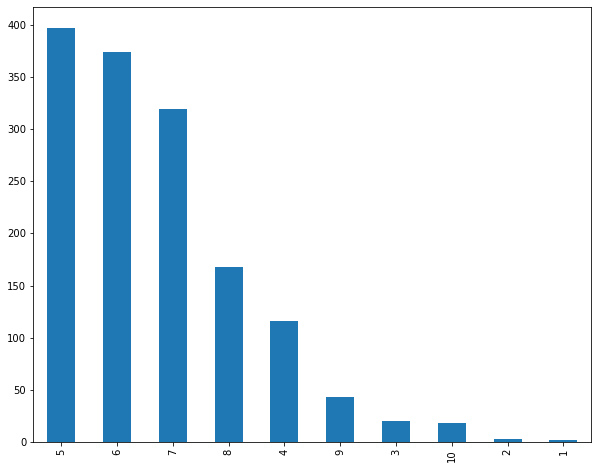

In [161]:
df_categ['OverallQual'] = df_categ['OverallQual'].apply(str)
plt.figure(figsize=(10,8))
df_categ['OverallQual'].value_counts().plot(kind = "bar")

In [162]:
stats.f_oneway(df_categ['SalePrice'][df_categ['OverallQual'] == '5'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '6'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '7'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '8'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '4'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '9'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '3'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '10'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '2'],
               df_categ['SalePrice'][df_categ['OverallQual'] == '1']
              )

F_onewayResult(statistic=349.0268395693078, pvalue=0.0)

In [194]:
df_categ['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

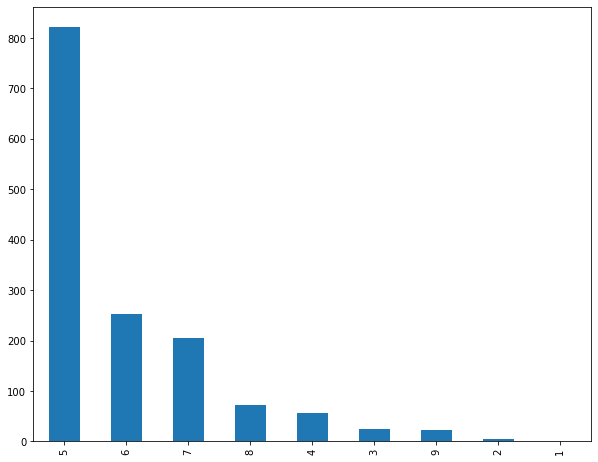

In [163]:
df_categ['OverallCond'] = df_categ['OverallCond'].apply(str)
plt.figure(figsize=(10,8))
df_categ['OverallCond'].value_counts().plot(kind = "bar")

In [164]:
stats.f_oneway(df_categ['SalePrice'][df_categ['OverallCond'] == '5'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '6'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '7'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '8'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '4'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '3'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '9'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '2'],
               df_categ['SalePrice'][df_categ['OverallCond'] == '1']
              )

F_onewayResult(statistic=26.00317308892095, pvalue=7.962288819950615e-38)

In [165]:
df_categ['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

### Variables to delete after ANOVA : ['Street', 'Utilities', 'LandSlope', 'Condition2']

In [192]:
#['Street', 'Utilities', 'LandSlope', 'Condition2']
df_categ.drop(['Street', 'Utilities', 'LandSlope', 'Condition2'], axis = 1, inplace = True)
print(df_categ.shape)

(1460, 38)


# Cramer's V

In [193]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))), 2)*100

In [194]:
cramer = np.zeros(shape = (38, 38))
cramer = pd.DataFrame(cramer)
cramer.columns = df_categ.columns
cramer.index = cramer.columns
df = df_categ.dropna(axis=0)
print(df.shape)
for i in range(len(cramer)):
    for j in range(len(cramer)):
        cramer.iloc[i, j] = cramers_v(df.iloc[:, i], df.iloc[:, j])

(1338, 38)


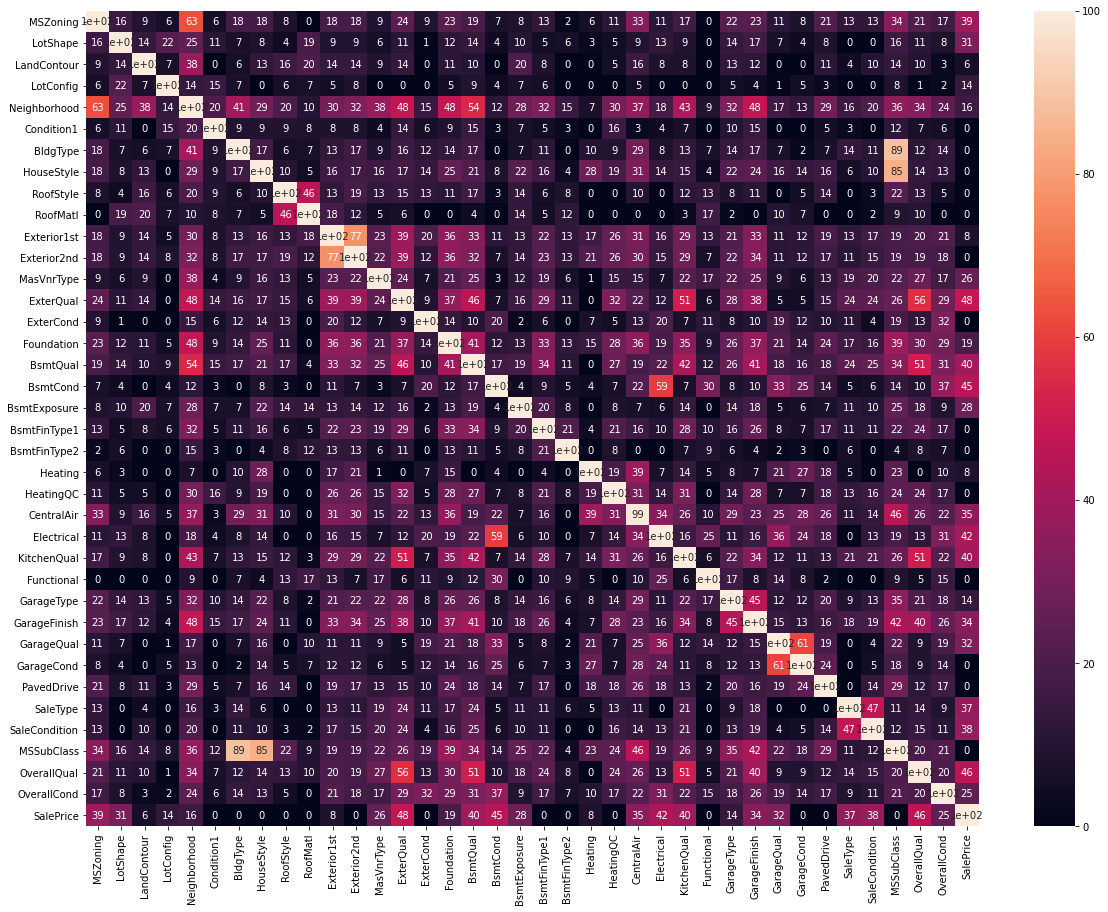

In [195]:
fig = plt.figure(figsize = (20, 15))
ax = sns.heatmap(cramer, annot=True)

## PCA 

### Fill NA by median

In [173]:
train_df_numeric = train_df_numeric.apply(lambda x: x.fillna(x.median()),axis=0)

In [174]:
from sklearn.preprocessing import StandardScaler
x = train_df_numeric.drop("SalePrice", axis = 1).values
x = StandardScaler().fit_transform(x) # normalizing the features

In [175]:
x.shape

(1460, 25)

In [176]:
norm_df = pd.DataFrame(x, columns = train_df_numeric.drop("SalePrice", axis = 1).columns)
norm_df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
0,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.107810,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.017598,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.068692
1,-0.091886,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.107927,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.068692
2,0.073480,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,1.189351,0.515013,1.107810,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.934226,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.068692
3,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,0.383659,1.107810,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.809167,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.068692
4,0.375148,0.951632,0.733308,1.366489,0.463568,-0.174865,0.199680,-0.045611,1.617877,1.299326,1.107810,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.892540,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.068692


In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_house_prices = pca.fit_transform(x)

Next, let's create a DataFrame that will have the principal component values for all 1460 samples.

In [190]:
cols = ['PC'+str(i) for i in range(8)]
pca_house_prices_df = pd.DataFrame(data = pca_house_prices
             , columns = cols)
pca_house_prices_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.401665,0.272466,-1.159159,-2.348984,-0.993417,-0.602099,0.378209,-0.736000
1,0.139970,-1.085919,0.504555,0.253486,-0.527262,0.587765,-0.520128,1.123957
2,1.503732,0.108409,-1.028188,-1.849470,-0.107441,-0.212654,-0.046662,-0.496589
3,-0.561903,1.096622,1.299497,0.071759,-0.027071,1.608705,-1.092564,-3.789048
4,4.094817,0.947027,-0.205285,-1.767133,-0.447295,-0.007570,-0.840848,-0.381640


In [191]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative var : ', pca.explained_variance_ratio_.sum())

Explained variation per principal component: [0.2513129  0.12332581 0.09082115 0.07414717 0.05021964 0.04274284
 0.04037705 0.03959105]
Cumulative var :  0.7125375951847933
